The data sets explored in this notebook are house sales data in King County, WA (in Seattle), and the the history of rainy days in Seattle. The chosen industry is real estate, with the inquiry being whether more houses sell on days where it doesn't rain.

Links:
https://www.kaggle.com/harlfoxem/housesalesprediction/version/1
https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017

In [24]:
import numpy as np
import pandas as pd

rainyDay = pd.read_csv("../data/seattleWeather_1948-2017.csv")
print(rainyDay.head(5))

houseSales = pd.read_csv("../data/kc_house_data.csv")
print(houseSales.head(5))

         DATE  PRCP  TMAX  TMIN  RAIN
0  1948-01-01  0.47    51    42  True
1  1948-01-02  0.59    45    36  True
2  1948-01-03  0.42    45    35  True
3  1948-01-04  0.31    45    34  True
4  1948-01-05  0.17    45    32  True
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770  

The data sets that are now in the data frame can be combined to establish additional value by binding the sets by date. My hypothesis is that more houses are sold on days where there is no rain. Additionally, it would be instructive to explore whether the weather in the period (i.e. 1 week) leading up to a sale matters, as well as if there is a subset that the weather plays a larger factor in, such as houses with waterfront views or homes at a certain pricepoint.

In [25]:
import dateutil.parser
def convertDate(oldDate):
    return dateutil.parser.parse(oldDate)

houseSales['date'] = houseSales['date'].apply(convertDate)
rainyDay['DATE'] = rainyDay['DATE'].apply(convertDate)
print(rainyDay.head(5))


combinedData = houseSales.merge(rainyDay, left_on='date', right_on='DATE', how='inner')
print(combinedData.head(5))



        DATE  PRCP  TMAX  TMIN  RAIN
0 1948-01-01  0.47    51    42  True
1 1948-01-02  0.59    45    36  True
2 1948-01-03  0.42    45    35  True
3 1948-01-04  0.31    45    34  True
4 1948-01-05  0.17    45    32  True
           id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13   221900.0         3       1.00         1180   
1  4036801170 2014-10-13   380000.0         4       1.75         1760   
2  1310900260 2014-10-13   318888.0         4       1.75         2320   
3  1373800295 2014-10-13  1450000.0         3       3.00         4380   
4  5102400105 2014-10-13   400000.0         4       1.00         1420   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0           0     0  ...    98178  47.5112 -122.257   
1      7300     1.0           0     0  ...    98008  47.6034 -122.125   
2     12000     1.0           0     0  ...    98032  47.3644 -122.280   
3      6320     2.0           0     3  ...    9

In the above code, I combined the two dataframes. First, however, I had to parse the dates to ensure they matched in type/formatting. The reason is because the date is the key by which the two dataframes are joined. These data sets were strong initially, meaning that the data was clean, concise, and without holes, all of which simplified the preparation process. Next we will look at some visualizations of the data using MatPlotLib.

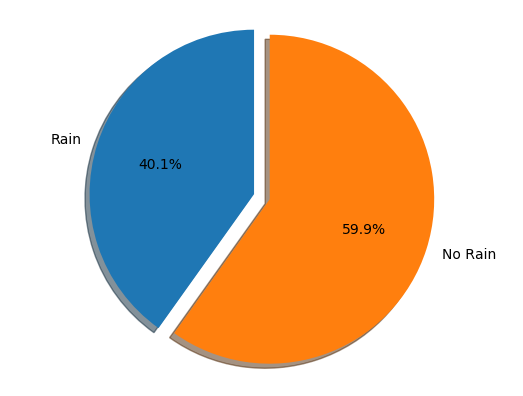

In [26]:
import matplotlib.pyplot as plt
labels = 'Rain' ,'No Rain'
rainSize = len(combinedData.loc[combinedData['RAIN'] == True])
noRainSize = len(combinedData.loc[combinedData['RAIN'] == False])

sizes = [rainSize, noRainSize]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The above pie chart shows the percentage of houses that sold on days with no rain versus on days with rain. As hypothesized, more houses are sold on days with no rain. Next we will look at the average price of homes sold on rainy days vs the average price of homes sold on days with no rain.

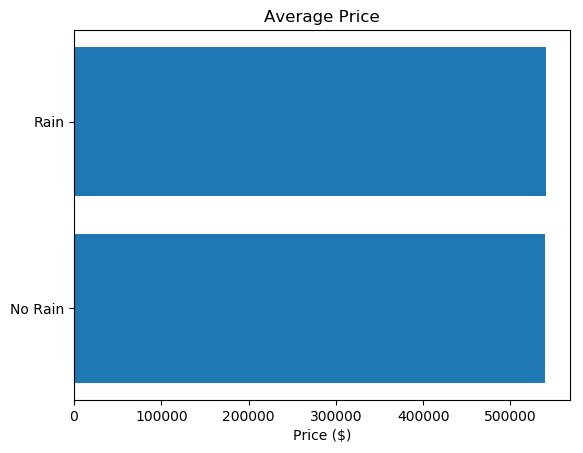

In [27]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
dataTypes = ('Rain', 'No Rain')
y_pos = np.arange(len(dataTypes))


rainOnly = (combinedData.loc[combinedData['RAIN'] == True])
noRainOnly = (combinedData.loc[combinedData['RAIN'] == False])

rainCost = rainOnly['price'].mean()
noRainCost = noRainOnly['price'].mean()

ax.barh(y_pos, [rainCost, noRainCost], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(dataTypes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price ($)')
ax.set_title('Average Price')

plt.show()

We see that the average sale price when raining or not raining is nearly identical, with the price on a rainy day at 541k dollars and a non rainy day at 539k dollars.

These explorations highlight some basic ways the combination of these datasets could be useful to analyze. Extensions could entail combining various factors to reach a conclusion, using rolling averages of precipitation level, etc. 